In [1]:
import pandas as pd
import numpy as np

# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

## Feature Selection
Reading the data and storing it as a dataframe for further analysis.

In [2]:
df =  pd.read_csv('data/cleanData.csv') 

In [3]:
df.head()

,distance,destination_dict,source_dict,hour,day_of_week,day,month,year,time_of_day,temp,clouds,pressure,rain,wind,name_dict,cab_type_dict,price
0,0.44,0,0,18,0,26,11,2018,6,43.82,0.99,1002.59,0.0997,11.57,1,0,11.0
1,1.08,1,1,2,1,27,11,2018,0,44.95,0.99,990.87,0.0087,6.14,3,0,27.5
2,1.11,2,2,15,6,16,12,2018,5,42.36,1.00,1012.15,0.2088,11.46,9,1,7.5
3,0.72,3,3,8,6,16,12,2018,2,42.35,0.91,1018.92,0.0100,9.44,3,0,26.0
4,3.24,1,3,19,0,26,11,2018,6,44.25,1.00,1000.81,0.1617,13.70,0,0,3.5


Split the dataframe into feature and labels. Here, we intend to predict the ride price. Hence, the label is price and the rest columns are our features.

In [4]:
X = df.drop(columns=['price'])
y = df['price']

Preparing a function to select the k best features.

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Feature 0: 8607.292071
Feature 1: 100.236228
Feature 2: 556.164676
Feature 3: 0.071463
Feature 4: 1.062200
Feature 5: 3.246834
Feature 6: 1.756395
Feature 7: nan
Feature 8: 0.048251
Feature 9: 1.205522
Feature 10: 0.328756
Feature 11: 9.146892
Feature 12: 0.824306
Feature 13: 0.236561
Feature 14: 143.229805
Feature 15: 430.944569


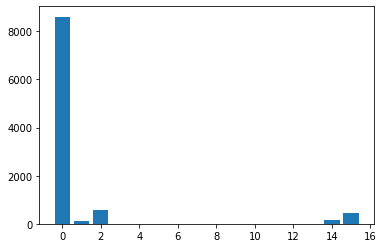

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [9]:
X.columns

Index(['distance', 'destination_dict', 'source_dict', 'hour', 'day_of_week',
       'day', 'month', 'year', 'time_of_day', 'temp', 'clouds', 'pressure',
       'rain', 'wind', 'name_dict', 'cab_type_dict'],
      dtype='object')

From the result, it is evident that the features at indexes 0,1,2,14,15 are important. We can use this and create a simple dataset to train out ML model.

In [11]:
allFeatures  = ['distance', 'destination_dict', 'source_dict', 'hour', 'day_of_week',
       'day', 'month', 'year', 'time_of_day', 'temp', 'clouds', 'pressure',
       'rain', 'wind', 'name_dict', 'cab_type_dict']

In [12]:
selectedFeatures = [allFeatures[0], allFeatures[1], allFeatures[2], allFeatures[14], allFeatures[15],'price']

In [14]:
new_df = df[selectedFeatures]

In [15]:
new_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
new_df.to_csv('data/simpleData.csv',index=False)